<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Береги-уровень-значимости-с-молоду" data-toc-modified-id="Береги-уровень-значимости-с-молоду-1">Береги уровень значимости с молоду</a></span><ul class="toc-item"><li><span><a href="#Песнь-льда-и-пламени" data-toc-modified-id="Песнь-льда-и-пламени-1.1">Песнь льда и пламени</a></span></li><li><span><a href="#Формализация-задачи:" data-toc-modified-id="Формализация-задачи:-1.2">Формализация задачи:</a></span><ul class="toc-item"><li><span><a href="#Коррекция-Бонферрони" data-toc-modified-id="Коррекция-Бонферрони-1.2.1">Коррекция Бонферрони</a></span></li><li><span><a href="#Метод-Холма" data-toc-modified-id="Метод-Холма-1.2.2">Метод Холма</a></span></li><li><span><a href="#Метод-Бенджамини-Хохберга" data-toc-modified-id="Метод-Бенджамини-Хохберга-1.2.3">Метод Бенджамини-Хохберга</a></span></li></ul></li></ul></li><li><span><a href="#Сколько-нужно-наблюдений" data-toc-modified-id="Сколько-нужно-наблюдений-2">Сколько нужно наблюдений</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-кнопке" data-toc-modified-id="Гипотеза-о-кнопке-2.1">Гипотеза о кнопке</a></span></li><li><span><a href="#Другие-тесты" data-toc-modified-id="Другие-тесты-2.2">Другие тесты</a></span></li><li><span><a href="#Кривые-мощности" data-toc-modified-id="Кривые-мощности-2.3">Кривые мощности</a></span></li></ul></li><li><span><a href="#Бутстрап" data-toc-modified-id="Бутстрап-3">Бутстрап</a></span><ul class="toc-item"><li><span><a href="#Д.И.-для-среднего-(пример-про-копилку)" data-toc-modified-id="Д.И.-для-среднего-(пример-про-копилку)-3.1">Д.И. для среднего (пример про копилку)</a></span><ul class="toc-item"><li><span><a href="#Д.И.-Эфрона" data-toc-modified-id="Д.И.-Эфрона-3.1.1">Д.И. Эфрона</a></span></li><li><span><a href="#Д.И.-Холла" data-toc-modified-id="Д.И.-Холла-3.1.2">Д.И. Холла</a></span></li><li><span><a href="#t-процентильный-Д.И." data-toc-modified-id="t-процентильный-Д.И.-3.1.3">t-процентильный Д.И.</a></span></li></ul></li><li><span><a href="#Д.И.-для-медианы-(цитаты-и-репосты)" data-toc-modified-id="Д.И.-для-медианы-(цитаты-и-репосты)-3.2">Д.И. для медианы (цитаты и репосты)</a></span></li></ul></li></ul></div>

#  Береги уровень значимости с молоду

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm as tqdm_botebook

plt.style.use('ggplot')

## Песнь льда и пламени

Говорят, Джордж Р.Р. Мартин, автор цикла "Песнь Льда и Пламени", истребляет Старков: чаще убивает персонажей, относящихся к этому дому, чем персонажей других домов. В таблице ниже приведено количество персонажей, относящихся к тому или иному дому, упомянутых за первые $4$ книги, а так же количество погибших персонажей.

| Дом | Упомянутые персонажи | Погибшие персонажи |
|-----|---------------------|------|
|House Stark	| 70 | 25 |
|House Lannister | 38 | 7 |
|House Greyjoy | 41 | 12 |
|Night's Watch |105 | 41 |

Нужно проверить гипотезу об этом на $5\%$ уровне значимости. 

## Формализация задачи:

Нам нужно проверить гипотезу о том, что доля смертей среди Старков совпадает со всеми остальными долями против альтернативы, что хотя бы в одной из ситуаций смертность в доме Старков больше:

\begin{equation*}
\begin{aligned} 
& H_0: p_S = p_L = p_G = p_{NW}  \\
& H_1: \text{хотя бы одна вероятность отличается}  
\end{aligned}
\end{equation*}

Протестируем все гипотезы без коррекции на множественное тестирование, а потом введём её. 

In [2]:
n_st = 70 
m_st = 25

n_lan = 38
m_lan = 7

n_gr = 41
m_gr = 12 

n_nw = 105
m_nw = 41 

alpha = 0.05

In [3]:
m_st/n_st, m_lan/n_lan, m_gr/n_gr, m_nw/n_nw

(0.35714285714285715,
 0.18421052631578946,
 0.2926829268292683,
 0.3904761904761905)

Проверяем три гипотезы!

In [4]:
from statsmodels.stats.proportion import proportions_ztest

_, p1 =  proportions_ztest((m_st, m_lan), 
                           (n_st, n_lan), 
                           value = 0, 
                           alternative = 'larger')


_, p2 =  proportions_ztest((m_st, m_gr), 
                           (n_st, n_gr), 
                           value = 0, 
                           alternative = 'larger')

_, p3 =  proportions_ztest((m_st, m_nw),
                           (n_st, n_nw), 
                           value = 0,
                           alternative = 'larger')

pval = np.array([p1, p2, p3])
pval

array([0.03008672, 0.24343199, 0.67209806])

In [5]:
pval > alpha # без коррекции, TRUE - не отвергается

array([False,  True,  True])

Самая первая гипотеза отвергается. Отсюда делаем вывод, что смертность значимо различается. Помним, что ошибка первого рода - ошибочный выбор альтернативы. В случае, когда мы никак не контролируем уровень значимости она оказывается завышена. Посмотрим, что будет происходить при корекции. 

### Коррекция Бонферрони

In [6]:
pval > alpha / 3  # поделили уровень значимости на число гипотез :) 

array([ True,  True,  True])

In [8]:
help(multipletests)

Help on function multipletests in module statsmodels.stats.multitest:

multipletests(pvals, alpha=0.05, method='hs', maxiter=1, is_sorted=False, returnsorted=False)
    Test results and p-value correction for multiple tests
    
    Parameters
    ----------
    pvals : array_like, 1-d
        uncorrected p-values.   Must be 1-dimensional.
    alpha : float
        FWER, family-wise error rate, e.g. 0.1
    method : str
        Method used for testing and adjustment of pvalues. Can be either the
        full name or initial letters. Available methods are:
    
        - `bonferroni` : one-step correction
        - `sidak` : one-step correction
        - `holm-sidak` : step down method using Sidak adjustments
        - `holm` : step-down method using Bonferroni adjustments
        - `simes-hochberg` : step-up method  (independent)
        - `hommel` : closed method based on Simes tests (non-negative)
        - `fdr_bh` : Benjamini/Hochberg  (non-negative)
        - `fdr_by` : Benjamini/

In [9]:
from statsmodels.sandbox.stats.multicomp import multipletests 

rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = alpha, 
                                            method = 'bonferroni') 
p_corrected

array([0.09026015, 0.73029598, 1.        ])

In [10]:
# ~rejected
p_corrected > alpha # TRUE - не отвергается

array([ True,  True,  True])

Все три гипотезы о равенстве смертностей не отвергаются.

### Метод Холма

In [12]:
rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = alpha, 
                                            method = 'holm') 
p_corrected

array([0.09026015, 0.48686399, 0.67209806])

In [13]:
p_corrected > alpha # TRUE - не отвергается

array([ True,  True,  True])

In [14]:
correction = np.arange(3,0,-1)
pval * correction

array([0.09026015, 0.48686399, 0.67209806])

In [15]:
correction

array([3, 2, 1])

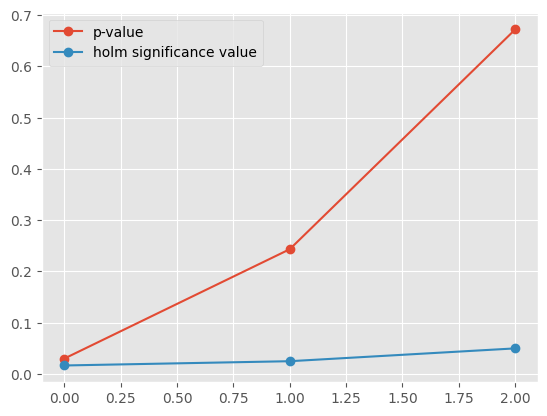

In [16]:
plt.plot(pval, 'o-',label='p-value')
plt.plot(alpha/correction, 'o-', label='holm significance value')
plt.legend()
plt.show()

Все три гипотезы о равенстве смертностей не отвергаются.

### Метод Бенджамини-Хохберга

In [17]:
rejected, p_corrected, _, _ = multipletests(pval, 
                                            alpha = alpha,
                                            method = 'fdr_bh') 
p_corrected

array([0.09026015, 0.36514799, 0.67209806])

In [18]:
pval

array([0.03008672, 0.24343199, 0.67209806])

In [19]:
p_corrected > 0.05 # TRUE - не отвергается

array([ True,  True,  True])

In [20]:
correction = np.arange(1,4,1)/3
pval / correction

array([0.09026015, 0.36514799, 0.67209806])

In [21]:
correction

array([0.33333333, 0.66666667, 1.        ])

Все три гипотезы о равенстве смертностей не отвергаются. В пакете есть и другие методы коррекции.

https://xkcd.com/882/

![](https://imgs.xkcd.com/comics/significant.png)

#  Сколько нужно наблюдений

Посмотрим на то, как для конкретных критериев можно расчитывать число наблюдений питоновскими средствами. 

## Гипотеза о кнопке

Посмотрим на пример с долями. У нас есть две кнопки: старая и новая. Мы хотим проверить гипотезу о том, что доля нажатий по обеим кнопкам совпадает. В качестве альтернативы рассматриваем вариант, что новый дизайн кнопки оказался лучше и нажать на неё хочется больше.

$$
\begin{aligned}
&H_0: \hspace{2mm} p_0 = p_a \\
&H_1: \hspace{2mm} p_0 < p_a  
\end{aligned}
$$

Величины $p_0$ и $p_a$ мы оцениваем, как отношение кликов на кнопку к показам в контрольной группе и в тестовой группе. Число наблюдений, которое нам необходимо, в таком случае, можно найти по формуле: 

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2,
$$

где $n$ - число наблюдений, $\alpha$ - ошибка первого рода, $\beta$ - ошибка второго рода, $z_{1 - \alpha}, z_{1 - \beta}$ - квантили нормального распределения. 


In [22]:
def get_size(p0, pa, alpha, beta):
    za = stats.norm.ppf(1 - alpha)
    zb = stats.norm.ppf(1 - beta)    
    n = za * np.sqrt(p0 * (1 - p0)) + zb * np.sqrt(pa * (1 - pa))
    n /= (pa - p0)
    return int(np.ceil(n*n))

In [23]:
alpha = 0.05
beta = 0.05

In [24]:
# сколько наблюдений надо, чтобы получить ошибки alpha и beta и уловить минимальный эффект pa - p0
get_size(0.10, 0.15, alpha, beta) 

468

Теперь посчитаем тоже самое с помощью пакета `statsmodels`. Внутри него есть функция `zt_ind_solve_power`. Она может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной пишется `None`. 

Обратите внимание, что в качестве размера эффекта в функцию подаётся стандартизированный эффект, а не оригинальный (отнормированный на стандартное отклонение)

$$
effect = \frac{p_0 - p_a}{se},
$$

при этом стандартная ошибка считается как 

$$
se = \sqrt{\frac{(n_1 - 1)\cdot s_1^2 + (n_2 - 1) \cdot s_2^2 }{n_1 + n_2 - 2}}.
$$

In [25]:
n_0, n_a = 468, 468   # размеры выборок
p_0, p_a = 0.1, 0.15  # доли 

# дисперсии
var_0 = p_0 * (1 - p_0)
var_a = p_a * (1 - p_a)

# стандартизированный размер эффекта
standartized_effect = \
    (p_a - p_0) / \
    np.sqrt(( (n_0-1) * var_0 + (n_a-1) * var_a) / (n_0 + n_a - 2))

standartized_effect

0.15161960871578062

In [26]:
from statsmodels.stats.power import zt_ind_solve_power

alpha = 0.05
beta = 0.05

# параметр ratio отвечает за то в какой из двух выборок больше наблюдений
sample_size = zt_ind_solve_power(
                    effect_size = standartized_effect,  # стандартизованный размер эффекта
                    nobs1 = None,           # число наблюдений None, тк их хотим найти 
                    alpha = alpha,          # уровень значимости 
                    power = (1 - beta),     # мощность
                    ratio = 1,              # перекос в выборках, если 0, тогда выборка только одна
                    alternative = 'larger'  # альтернатива
                )

print(sample_size) # у нас две выборки, на каждую поровну

941.5291210637375


Подставив `None` вместо другого аргумента функции, можем рассчитать что-нибудь ещё. Например, мощность теста.

In [27]:
zt_ind_solve_power(effect_size = 0.15219, 
                   nobs1 = 941, 
                   alpha = alpha,
                   power = None, 
                   ratio = 1,
                   alternative = 'larger')

0.9511696099123256

Или размер эффекта. 

In [28]:
zt_ind_solve_power(effect_size = None, 
                   nobs1 = 2*467, 
                   alpha = alpha, 
                   power = 1-beta, 
                   ratio = 1, 
                   alternative = 'larger')

0.1522295561785361

По аналогии можно работать с любой асимптотически нормальной статистикой. 

## Другие тесты

По аналогии реализованы [многие другие тесты.](https://www.statsmodels.org/stable/stats.html) Например, тест Стьюдента. Рассмотрим тест для равенства средних при неизвестных, но равных дисперсиях. 

Класс `TTestIndPower` предназначен для анализа мощности для t-теста Стьюдента с независимыми выборками (`TTestPower` для обычного либо с зависимыми выборками).

У каждого объекта этого класса есть метод `solve_power`. Он может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной ствится `None`. 

Снова в качестве эффекта на вход идёт стандартизованный эффект: 

$$
effect = \frac{\bar{x_1} - \bar{x_2}}{se},
$$


In [29]:
from statsmodels.stats.power import TTestIndPower

effect = 0.5
alpha = 0.05
power = 0.95

analysis = TTestIndPower()
analysis.solve_power(effect, 
                     nobs1 = None, 
                     power = power, 
                     alpha = alpha, 
                     ratio = 1)

104.9279466344438

## Кривые мощности

Построим для мощностей кривые. Они будут показывать размер эффекта и размер выборки влияют на мощность теста. 

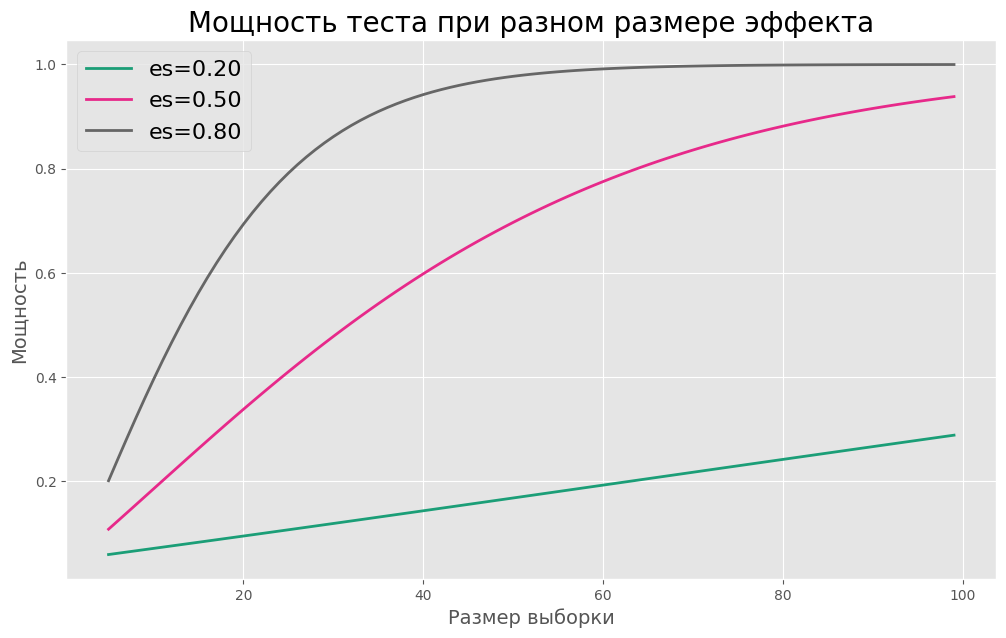

In [30]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))

analysis = TTestIndPower()

_, axes = plt.subplots(1, 1, figsize=(12,7))

analysis.plot_power(
    dep_var='nobs',
    nobs=sample_sizes, 
    effect_size=effect_sizes,
    ax=axes
)

axes.set_title("Мощность теста при разном размере эффекта", fontsize = 20)
axes.set_xlabel("Размер выборки", fontsize = 14)
axes.set_ylabel("Мощность", fontsize = 14)
plt.legend(fontsize = 16);

На графике мы видим как меняется мощность критерия при трёх разных размерах эффекта. Если нас интересует большой эффект, то мы выходим к единице при примерно $60$ наблюдениях.

# Бутстрап

В этой тетрадке речь пойдёт про бустрап.

* [Статья про бустрэп от Станислава Анатольева](http://quantile.ru/03/03-SA.pdf)
* [Неплохая статья про бутстрап в R, на основе которой делалась тетрадка](https://moderndive.com/8-confidence-intervals.html)

In [31]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Д.И. для среднего (пример про копилку)



![](https://d33wubrfki0l68.cloudfront.net/fe3d13cf8652057fd5ea97fc4d7db1f00b2b1f34/62975/images/sampling/pennies/deliverable/3.jpg)

Представим, что завели себе копилку и собираем десятирублёвые монеты. Интересно как именно распределён возраст этих монет.

Сделали из копилки случайную выборку из сотни десятирублёвых монет и записали дату с каждой в файл `money.csv`.

In [32]:
x = pd.read_csv('./money.csv').fielddate.values
x

array([2011, 2017, 2016, 2012, 2017, 2015, 2011, 2015, 2017, 2012, 2019,
       2019, 2012, 2018, 2018, 2018, 2018, 2017, 2018, 2012, 2010, 2012,
       2012, 2011, 2011, 2012, 2011, 2017, 2017, 2016, 2012, 2012, 2017,
       2017, 2012, 2010, 2018, 2016, 2011, 2017, 2012, 2017, 2013, 2017,
       2010, 2011, 2018, 2015, 2011, 2018, 2012, 2013, 2009, 2017, 2017,
       2018, 2019, 2018, 2011, 2013, 2011, 2013, 2017, 2018, 2011, 2012,
       2018, 2012, 2019, 2018, 2011, 2017, 2019, 2019, 2019, 2012, 2011,
       2013, 2011, 2017, 2013, 2013, 2017, 2017, 2017, 2011, 2019, 2013,
       2017, 2012, 2009, 2010, 2010, 2020, 2019, 2020, 2020, 2019, 2018,
       2020])

In [33]:
x = 2024 - x # перешли к возрасту
x

array([13,  7,  8, 12,  7,  9, 13,  9,  7, 12,  5,  5, 12,  6,  6,  6,  6,
        7,  6, 12, 14, 12, 12, 13, 13, 12, 13,  7,  7,  8, 12, 12,  7,  7,
       12, 14,  6,  8, 13,  7, 12,  7, 11,  7, 14, 13,  6,  9, 13,  6, 12,
       11, 15,  7,  7,  6,  5,  6, 13, 11, 13, 11,  7,  6, 13, 12,  6, 12,
        5,  6, 13,  7,  5,  5,  5, 12, 13, 11, 13,  7, 11, 11,  7,  7,  7,
       13,  5, 11,  7, 12, 15, 14, 14,  4,  5,  4,  4,  5,  6,  4])

Посмотрим как распределён возраст. 

In [36]:
x.shape

(100,)

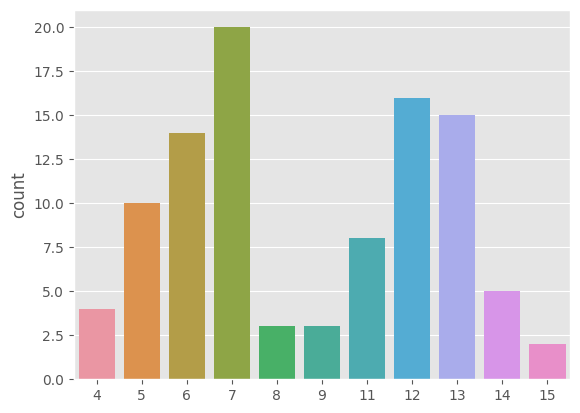

In [34]:
sns.countplot(x = x);

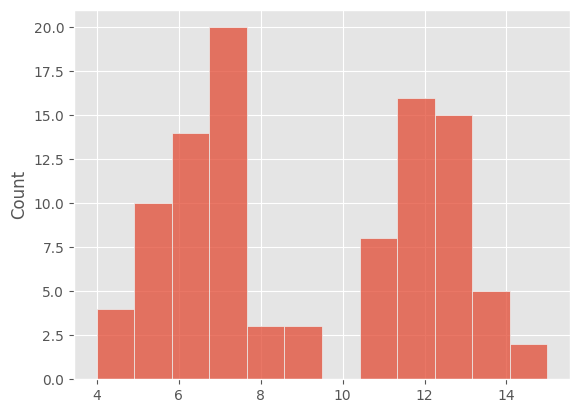

In [35]:
sns.histplot(x, bins = 12);

Распределение оказывается нестандартным. Видно, что у него есть две моды. Посмотрим на средний возраст монет.

In [37]:
x.mean()

9.16

In [38]:
np.median(x)

8.0

Интересно было бы построить для этого среднего доверительный интервал. Сделаем это с помощью бустрапа.

Напишем функцию для бустрапирования.

In [53]:
def get_bootstrap_sample(x, B_sample = 1):
    N = x.size
    sample = np.random.choice(x, size = (N, B_sample), replace = True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

In [55]:
x

array([13,  7,  8, 12,  7,  9, 13,  9,  7, 12,  5,  5, 12,  6,  6,  6,  6,
        7,  6, 12, 14, 12, 12, 13, 13, 12, 13,  7,  7,  8, 12, 12,  7,  7,
       12, 14,  6,  8, 13,  7, 12,  7, 11,  7, 14, 13,  6,  9, 13,  6, 12,
       11, 15,  7,  7,  6,  5,  6, 13, 11, 13, 11,  7,  6, 13, 12,  6, 12,
        5,  6, 13,  7,  5,  5,  5, 12, 13, 11, 13,  7, 11, 11,  7,  7,  7,
       13,  5, 11,  7, 12, 15, 14, 14,  4,  5,  4,  4,  5,  6,  4])

In [81]:
x_boot = get_bootstrap_sample(x)
x_boot

array([ 9, 11, 12, 13,  6,  8, 13,  6, 13, 13,  7,  6,  7,  5,  5, 15,  6,
       11,  6, 13,  7,  4, 12, 14,  8, 14,  5,  9, 12, 12, 14,  7,  5, 14,
        5, 14,  7,  7, 13,  5,  6,  7, 12,  4, 11,  5, 12,  5, 12,  5, 13,
        7, 12,  5,  6,  6, 15,  6,  7, 12,  9,  6, 13,  9,  7,  6,  7,  7,
       12, 14, 13,  6,  7,  6,  7,  7,  6,  7, 11, 12, 12, 13, 11,  6, 13,
        5,  7,  7,  5, 11, 11, 12,  6, 13,  5, 13, 12,  8, 13, 11])

Давайте сравним распределение выборки, которую мы сэмплировали с исходной.

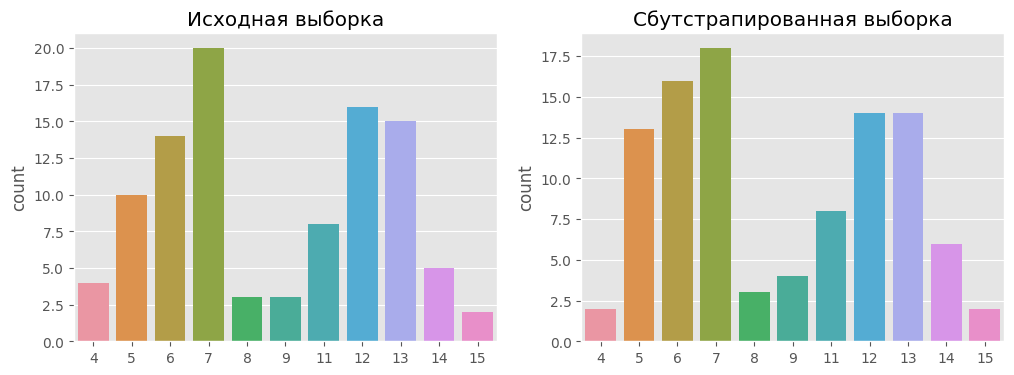

In [82]:
_, axes = plt.subplots(1, 2, figsize = (12,4))

sns.countplot(x = x, ax = axes[0])
sns.countplot(x = x_boot, ax = axes[1])
axes[0].set_title("Исходная выборка")
axes[1].set_title("Сбутстрапированная выборка");

Сгенерируем выборку из средних.

In [83]:
# генерируем 1 миллион выборок размера 100
x_boot = get_bootstrap_sample(x, B_sample = 10**6)
x_boot.shape

(100, 1000000)

In [84]:
x_boot

array([[12, 14,  6, ..., 15, 12,  7],
       [14,  6,  6, ...,  5,  9,  5],
       [ 7, 13,  5, ..., 12, 12,  7],
       ...,
       [12, 14,  7, ...,  6,  6, 13],
       [ 8, 13,  5, ..., 12,  6, 12],
       [13, 13,  5, ...,  7,  7,  9]])

In [85]:
x_boot_m = np.mean(x_boot, axis = 0)
x_boot_m

array([9.57, 9.71, 8.57, ..., 9.35, 9.08, 8.7 ])

In [86]:
x_boot_m.shape

(1000000,)

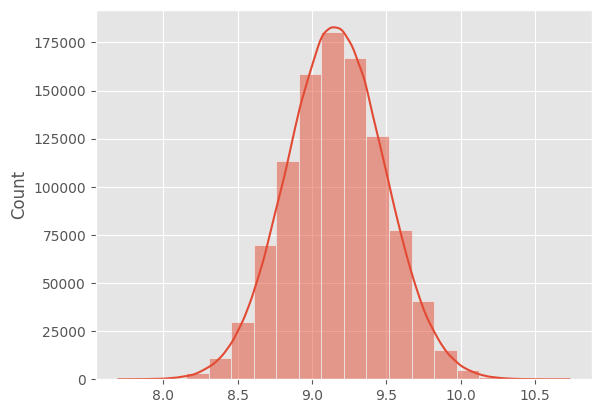

In [87]:
sns.histplot(x_boot_m, bins = 20, kde = True);

Сравним получившееся распределение с нормальным. Они оказываются похожи. Это связано с тем, что мы бустрапируем среднее, в возрасте монет нет выбросов, поэтому тут хорошо работает ЦПТ. 

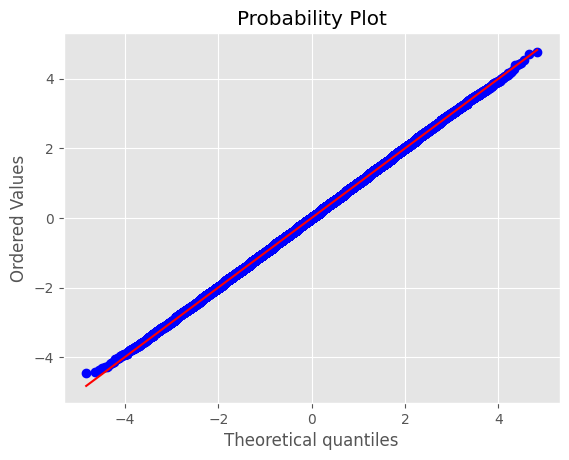

In [88]:
x_scale = (x_boot_m - x_boot_m.mean()) / x_boot_m.std()
stats.probplot(x_scale, dist = "norm", plot = plt);

### Д.И. Эфрона

Построим доверительный интервал для среднего. 

In [89]:
alpha = 0.05

# посчитали 1 миллион средних по каждой из бутстраппированных выборок
x_boot_m = np.mean(x_boot, axis = 0)

lower = np.quantile(x_boot_m, alpha / 2)
upper = np.quantile(x_boot_m, 1-alpha / 2)
lower, upper

(8.52, 9.81)

In [90]:
upper-lower

1.290000000000001

In [91]:
d = 1.96*(x.var(ddof=1)/x.size)**0.5
x.mean() - d, x.mean() + d

(8.512801163677365, 9.807198836322636)

In [92]:
2*d

1.2943976726452715

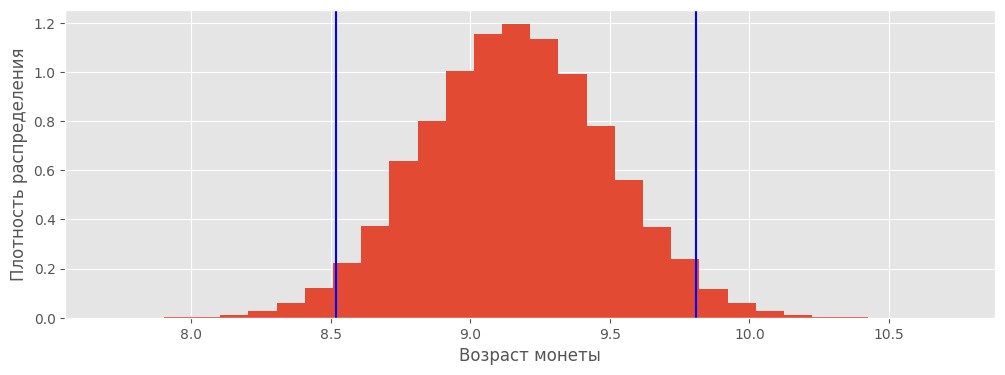

In [93]:
fig = plt.figure(figsize=(12,4))
plt.hist(x_boot_m, bins=30, density=True)
plt.axvline(lower, color='b')
plt.axvline(upper, color='b');

plt.xlabel('Возраст монеты')
plt.ylabel('Плотность распределения');

### Д.И. Холла

In [94]:
alpha = 0.05

# сначала фиксируем глобальное среднее по всей выборке
theta_hat = np.mean(x)

x_boot = get_bootstrap_sample(x, B_sample = 10**6)

# центрируем с помощью глобального среднего
x_boot_centered = x_boot - theta_hat

# снова считаем статистику по центрированным бутстраппированным выборкам
bias_boot = np.mean(x_boot_centered, axis = 0)


# считаем квантили и вычитаем/прибавляем от глобальгого среднего
lower = theta_hat - np.abs(np.quantile(bias_boot, alpha/2))
upper = theta_hat + np.abs(np.quantile(bias_boot, 1-alpha/2))

lower, upper

(8.520000000000001, 9.800000000000002)

In [96]:
bias_boot.shape

(1000000,)

In [97]:
upper - lower

1.2800000000000011

###  t-процентильный Д.И.

In [98]:
# сначала фиксируем глобальное среднее и выборочную дисперсию по всей выборке
theta_hat = np.mean(x)
std_hat = np.std(x)

# делаем бутстрап-выборки
x_boot = get_bootstrap_sample(x, B_sample = 10**6)

# центрируем (вычитаем глобальное среднее)
x_boot_centered = x_boot - theta_hat
x_boot_t = np.mean(x_boot_centered, axis = 0)

# считаем ст. отклонение по каждой бутстрап-выборке
x_boot_std = np.std(x_boot, axis = 0)
# стандартизуем
x_boot_t /= x_boot_std


lower = theta_hat - np.abs(np.quantile(x_boot_t, alpha/2))*std_hat
upper = theta_hat + np.abs(np.quantile(x_boot_t, 1-alpha/2))*std_hat
lower, upper

(8.49978874099854, 9.811929568269742)

In [99]:
upper - lower

1.312140827271202

Последний доверительный интервал получился пошире. [Теория показывает,](http://quantile.ru/03/03-SA.pdf) что последний способ даёт более низкую ошибку в плане асимптотики. 